In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from scipy import stats, interpolate
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [2]:
df = pd.read_csv("C:\\Users\\DUC-PC\\Downloads\\Diem.csv")

In [3]:
df.sample(10)

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
694,695,5.94,0.89,224,191,Nữ,Khác,2,15,1.85,0,1.73
390,391,5.73,0.74,175,64,Nam,Kinh,2,104,1.75,1,2.45
127,128,5.80,0.93,161,147,Nam,Kinh,1,26,1.71,0,1.65
553,554,7.13,0.79,574,81,Nam,Kinh,1,0,1.21,0,0.00
173,174,6.50,1.02,288,197,Nam,Kinh,1,38,1.25,1,2.07
689,690,5.52,0.93,624,285,Nam,Kinh,1,0,1.82,0,0.00
389,390,5.73,0.74,175,64,Nam,Kinh,1,92,2.25,1,2.47
464,465,7.76,0.73,609,17,Nam,Kinh,2,41,3.00,0,2.97
216,217,5.80,0.73,457,279,Nam,Kinh,2,89,1.14,1,1.92
544,545,4.48,0.83,534,165,Nam,Khác,2,95,1.60,1,1.92


In [93]:
#Ham
def tinh_variance(data):
    var = np.var(data)
    return var

def tinh_std(data):
    std = np.std(data, ddof=1)
    return std
    
def tinh_med(data):
    med = np.median(data)
    return med

def tinh_mod(data):
    mod = sta.mode(data)
    return mod

def results(p, vals=['score', 'p_value'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

def hist_plot(data, color):
    mu = np.mean(data)
    sigma = np.std(data)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), color = 'black')
    plt.hist(data, density=True, color = random.choice(color), edgecolor = 'black')
    plt.title(data.name)
    plt.show()

def qq_plot(data):
    sm.qqplot(data, line ='45', color = 'cyan')
    plt.show()
    
#Hàm Kolmogorov để kiểm tra xem các mẫu hiện tại có tuân theo phân phối chuẩn hay không
def Kolmogorov(data):
    print("Kiểm định Kolmogorov -", data.name)
    k, p = stats.kstest(rvs=data, cdf='norm', args=(np.mean(data), np.std(data)))
    if p > 0.05:
        print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn''')
    else:
        print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này ngụ ý rằng các mẫu hiện tại không tuân theo luật phân phối chuẩn''')
    print("------------------------------")
    
def bartlett(a, b): 
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Kiểm định Bartlett:")
    stat, pvalue = stats.bartlett(a, b)
    print("Statistic =", stat, "\n",
          "p value =", pvalue)
    if pvalue > 0.05:
        print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. 
        Điều này ngụ ý các mẫu hiện tại mang tính đồng nhất về phương sai''')
    else:
        print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. 
         Điều này ngụ ý mẫu hiện tại không đồng nhất về phương sai''')
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    
#Hàm kiểm định ANOVA 1 chiều
def anova(a, b, c, d):
    df = (a, b, c, d)
    print("Kiểm định ANOVA:")
    stat, pvalue = stats.f_oneway(a, b, c, d)
    print("Stat =", stat, "\n", "p value =", pvalue)
    if pvalue < 0.05:
        print("Có bằng chứng thống kê để bác bỏ giả thuyết H0")
    else:
        print("Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0")

# Câu 1

In [5]:
TBTN = df['Điểm TBTN']
TiLe_VT = df['Tỉ lệ Văn/Toán']
DGK = df['Điểm giữa kỳ']
DCK = df['Điểm cuối kỳ']
#Tinh variance
print("Phương sai của Điểm TBTN =", tinh_variance(TBTN))
print("Phương sai của Tỉ lệ Văn/Toán =", tinh_variance(TiLe_VT))
print("Phương sai của Điểm giữa kỳ =", tinh_variance(DGK))
print("Phương sai của của Điểm cuối kỳ =", tinh_variance(DCK))
print("-------------------------------")
#Tinh do lech chuan hieu chinh
print("Độ lệch chuẩn (hiệu chỉnh) của Điểm TBTN =", tinh_std(TBTN))
print("Độ lệch chuẩn (hiệu chỉnh) của Tỉ lệ Văn/Toán =", tinh_std(TiLe_VT))
print("Độ lệch chuẩn (hiệu chỉnh) của Điểm giữa kỳ =", tinh_std(DGK))
print("Độ lệch chuẩn (hiệu chỉnh) của Điểm cuối kỳ =", tinh_std(DCK))
print("-------------------------------")
#tinh trung vi
print("Trung vị của Điểm TBTN =", tinh_med(TBTN))
print("Trung vị của Tỉ lệ Văn/Toán =", tinh_med(TiLe_VT))
print("Trung vị của Điểm giữa kỳ =", tinh_med(DGK))
print("Trung vị của Điểm cuối kỳ =", tinh_med(DCK))
print("-------------------------------")


#tao 1 dataframe chua cac bien dinh luong (float) cua file Diem.csv
df1 = df[['Điểm TBTN', 'Tỉ lệ Văn/Toán', 'Điểm giữa kỳ', 'Điểm cuối kỳ']]
#mo ta 
df1.describe()

Phương sai của Điểm TBTN = 1.3807782809748494
Phương sai của Tỉ lệ Văn/Toán = 0.02356449553766092
Phương sai của Điểm giữa kỳ = 0.5740173796366133
Phương sai của của Điểm cuối kỳ = 0.9793022031922254
-------------------------------
Độ lệch chuẩn (hiệu chỉnh) của Điểm TBTN = 1.1758697878898305
Độ lệch chuẩn (hiệu chỉnh) của Tỉ lệ Văn/Toán = 0.15361242029385003
Độ lệch chuẩn (hiệu chỉnh) của Điểm giữa kỳ = 0.7581581001441571
Độ lệch chuẩn (hiệu chỉnh) của Điểm cuối kỳ = 0.9902745644817966
-------------------------------
Trung vị của Điểm TBTN = 6.29
Trung vị của Tỉ lệ Văn/Toán = 0.84
Trung vị của Điểm giữa kỳ = 2.33
Trung vị của Điểm cuối kỳ = 2.17
-------------------------------


,Điểm TBTN,Tỉ lệ Văn/Toán,Điểm giữa kỳ,Điểm cuối kỳ
count,731.000000,731.000000,731.000000,731.000000
mean,6.283543,0.854802,2.331382,2.080629
std,1.175870,0.153612,0.758158,0.990275
min,3.150000,0.460000,0.000000,0.000000
25%,5.520000,0.750000,1.840000,1.870000
50%,6.290000,0.840000,2.330000,2.170000
75%,7.130000,0.940000,2.830000,2.665000
max,10.000000,1.420000,4.000000,4.000000


# Câu 2

In [6]:
def stat_table(a):
    x = df.groupby(a)[a].count()
    dt = pd.DataFrame(x)
    dt.columns = ['Percent']
    percent = []
    for i in dt['Percent']:
        x = (i/len(df[a]))*100
        percent.append(x)
    dt['Percent'] = percent
    print(dt)
    mylabels = dt.index
    fig = plt.figure(figsize = (5, 10))
    # barplot
    sns.barplot(percent, mylabels, data = dt, orient = 'h')

           Percent
Dân tộc           
Khác     24.213406
Kinh     75.786594


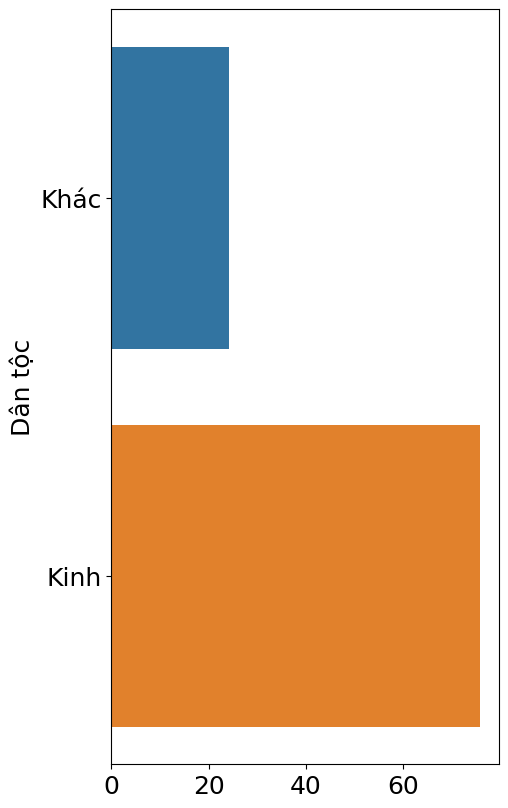

In [7]:
stat_table("Dân tộc")

             Percent
Giới tính           
Nam        75.512996
Nữ         24.487004


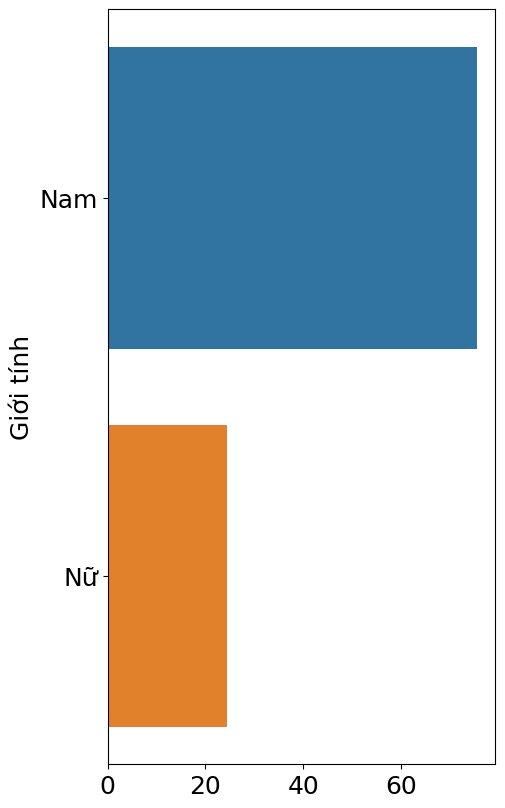

In [8]:
stat_table("Giới tính")

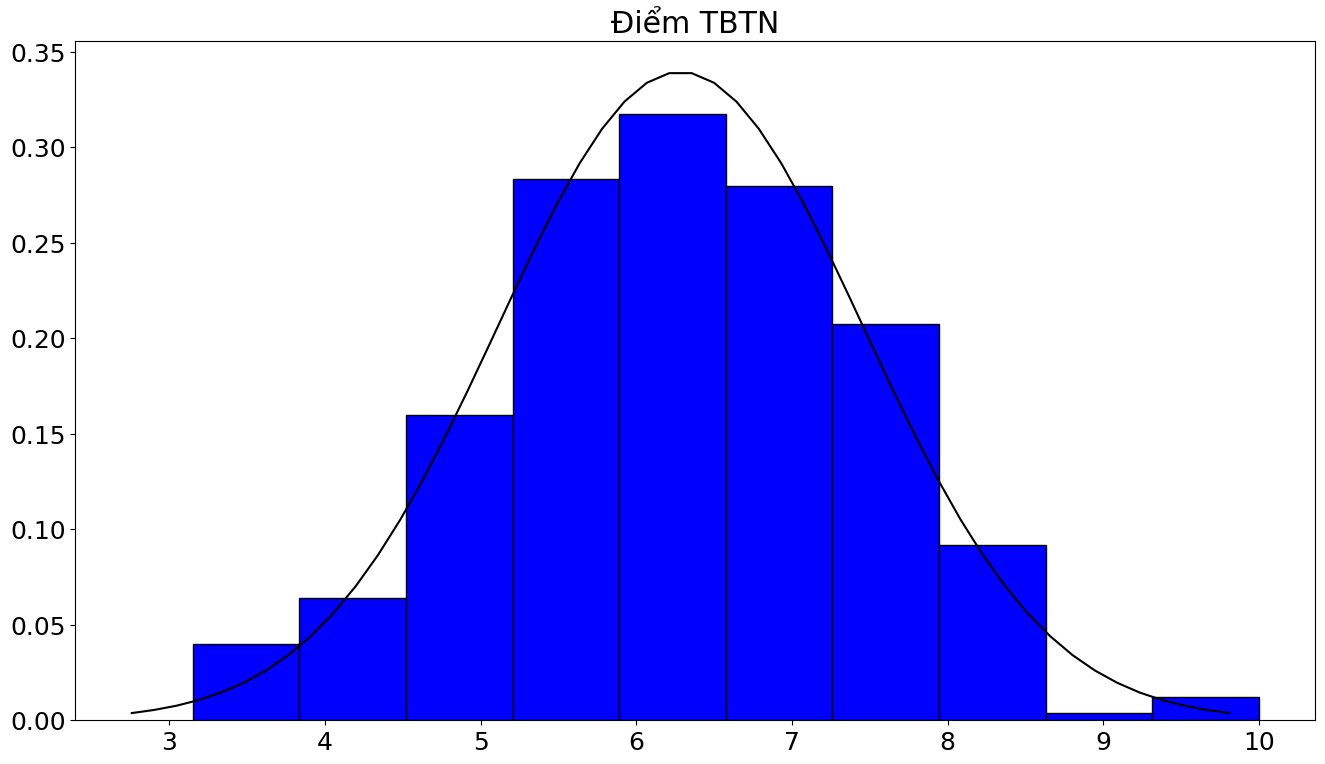

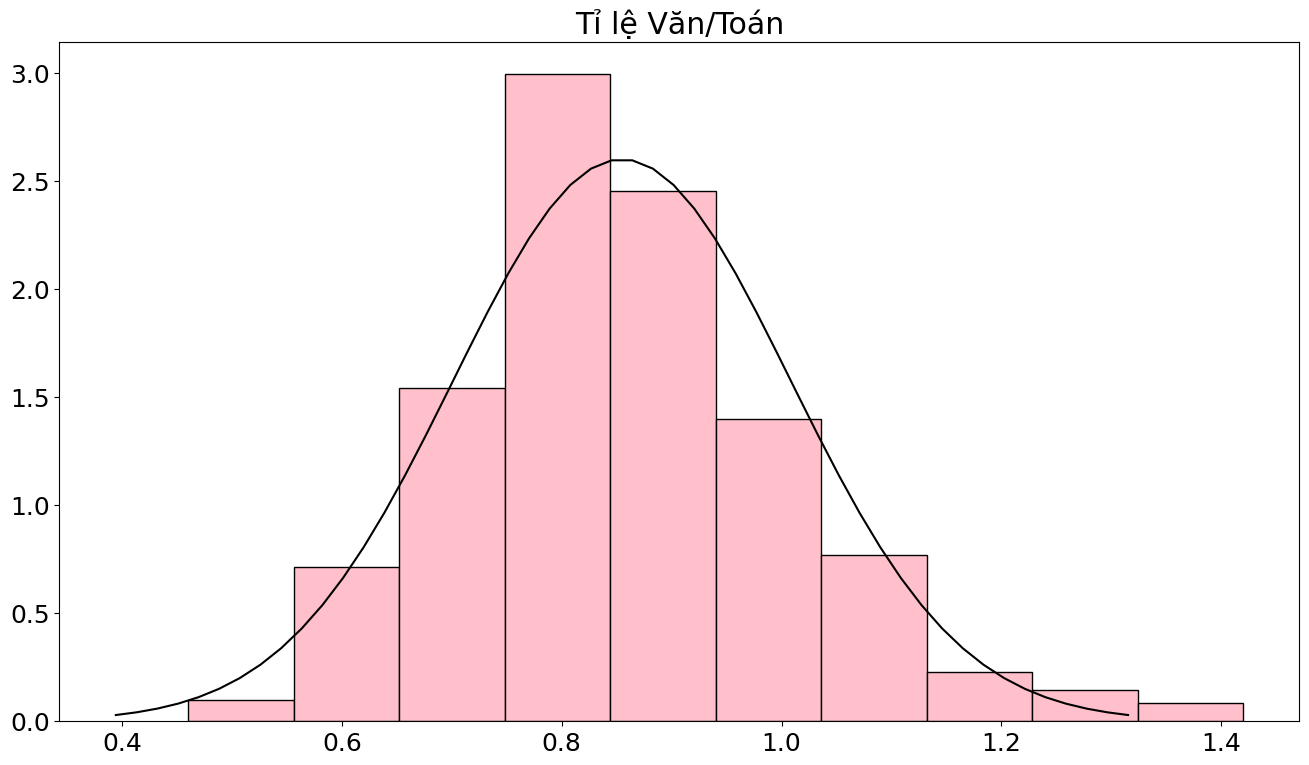

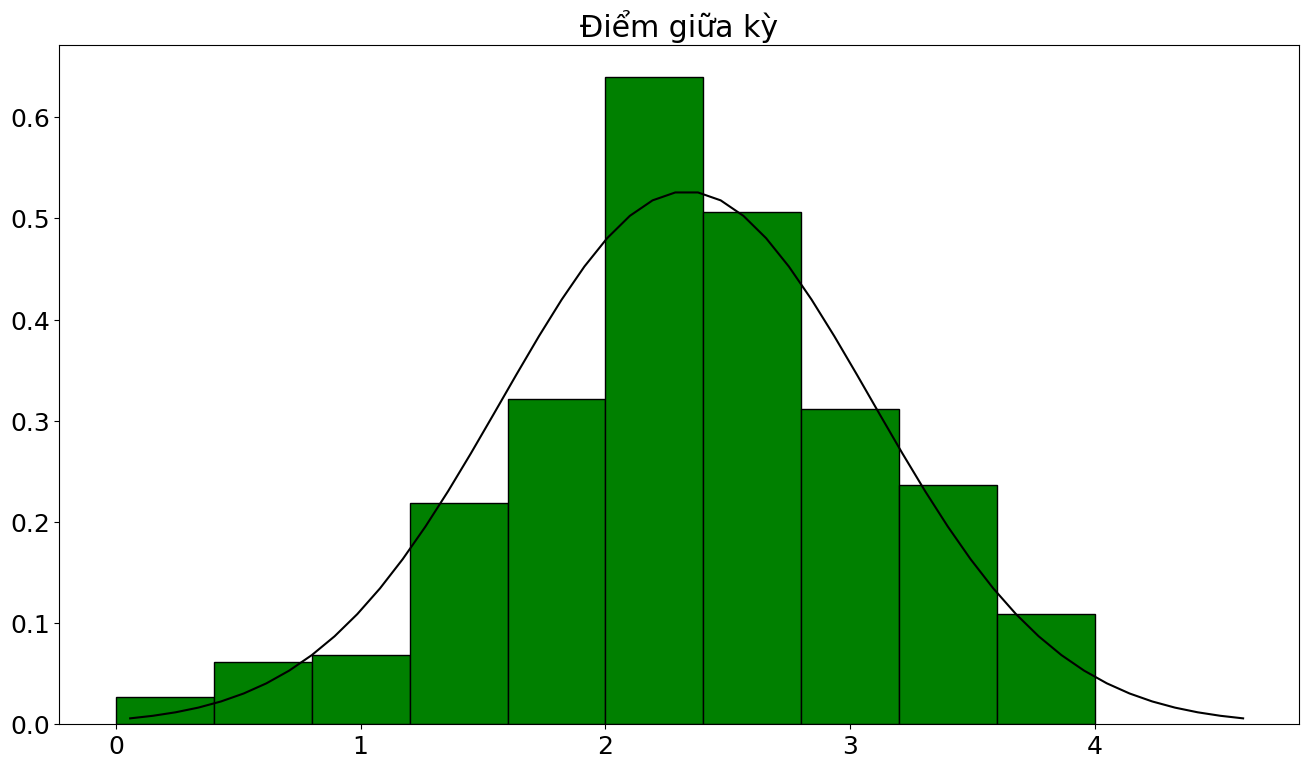

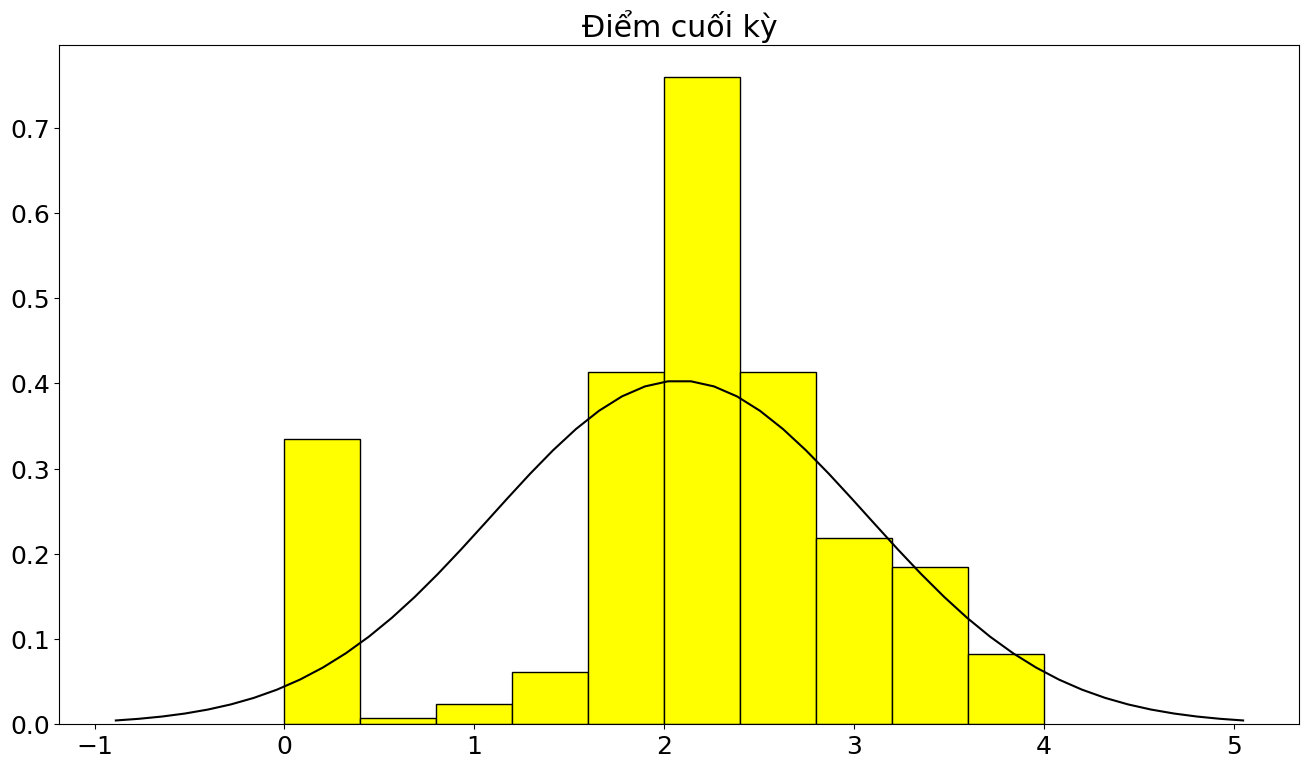

In [9]:
color = (['red', 'blue', 'yellow','pink', 'purple', 'green'])
hist_plot(df1["Điểm TBTN"], color)
hist_plot(df1["Tỉ lệ Văn/Toán"], color)
hist_plot(df1["Điểm giữa kỳ"], color)
hist_plot(df1["Điểm cuối kỳ"], color)

# Câu 3

In [81]:
DCK1 = []
DCK2 = []
DCK_01 = df["Điểm cuối kỳ"]
GT = df["Giới tính"]

for i in range(0, len(df)):
    if GT[i] == 'Nam':
        DCK1.append(DCK_01[i])
    else:
        DCK2.append(DCK_01[i])

DCK_02 = list(zip(DCK1, DCK2))
df2 =  pd.DataFrame(DCK_02, columns = ("Nam", "Nữ"))
df3 = df2.sample(30)

In [84]:
stat, p_value = stats.ttest_ind(df3["Nam"], df3["Nữ"])
print('Stat =', stat, 'và', 'p_value =', p_value)
if p_value < 0.05:
    print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          có sự khác nhau về điểm trung bình cuối kỳ của sinh viên theo giới tính''')
else:
    print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
    không có sự khác nhau về điểm trung bình cuối kỳ của sinh viên theo giới tính''')

Stat = -0.7369830388742515 và p_value = 0.46410353364117574
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
    không có sự khác nhau về điểm trung bình cuối kỳ của sinh viên theo giới tính


In [85]:
DCK3 = []
DCK4 = []
TT = df["Thể thao"]

for i in range(0, len(df)):
    if TT[i] == 'Có':
        DCK3.append(DCK_01[i])
    else:
        DCK4.append(DCK_01[i])

DCK_03 = list(zip(DCK3, DCK4))
df4 =  pd.DataFrame(DCK_02, columns = ("Có", "Không"))
df5 = df4.sample(30)

In [86]:
stat, p_value = stats.ttest_ind(df5["Có"], df5["Không"])
print('Stat =', stat, 'và', 'p_value =', p_value)
if p_value < 0.05:
    print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          có sự khác nhau về điểm trung bình cuối kỳ của sinh viên theo thể thao''')
else:
    print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
    không có sự khác nhau về điểm trung bình cuối kỳ của sinh viên theo thể thao''')

Stat = -0.9047694337934742 và p_value = 0.3693305516055335
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
    không có sự khác nhau về điểm trung bình cuối kỳ của sinh viên theo thể thao


# Câu 4

In [6]:
bins = [0, 15, 45, 75, 135]
df['StudyHours'] = pd.cut(df['Thời gian tự học'], bins, labels = ['Thấp','Trung bình','Nhiều','Rất nhiều'])
df.sample(10)

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ,StudyHours
439,440,4.69,0.91,315,231,Nam,Khác,1,106,2.00,1,2.02,Rất nhiều
179,180,6.29,0.91,637,76,Nữ,Kinh,1,86,3.00,0,2.77,Rất nhiều
285,286,5.31,1.17,272,163,Nam,Kinh,1,25,2.40,0,2.24,Trung bình
356,357,7.13,1.32,519,68,Nam,Khác,2,84,3.21,1,2.55,Rất nhiều
331,332,8.04,0.80,283,13,Nữ,Kinh,1,0,1.76,0,0.00,NaN
596,597,4.69,0.86,87,42,Nam,Khác,2,52,1.38,1,2.01,Nhiều
411,412,7.41,0.93,657,141,Nam,Kinh,1,0,3.07,0,0.00,NaN
214,215,5.10,0.59,260,116,Nam,Khác,2,47,1.69,0,2.23,Nhiều
212,213,7.69,1.04,10,6,Nam,Kinh,2,70,2.26,0,2.31,Nhiều
336,337,6.15,1.20,230,82,Nam,Khác,2,70,1.75,1,2.00,Nhiều


In [48]:
bins1 = [0, 1.0, 1.7, 2.7, 3.7, 4.0]
df['LetterGrade'] = pd.cut(df['Điểm cuối kỳ'], bins1, labels = ['F', 'D', 'C', 'B', 'A'])
df.sample(10)

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ,StudyHours,LetterGrade
604,605,6.01,0.62,259,70,Nam,Kinh,2,52,1.25,1,2.26,Nhiều,C
281,282,7.69,0.77,53,10,Nam,Kinh,1,27,3.00,0,3.18,Trung bình,B
168,169,7.90,0.79,450,1,Nữ,Kinh,2,92,3.63,0,3.92,Rất nhiều,A
294,295,5.94,0.85,358,135,Nam,Kinh,2,36,3.00,1,1.77,Trung bình,C
469,470,7.06,0.77,771,129,Nam,Kinh,1,25,2.43,0,2.32,Trung bình,C
728,729,7.06,0.84,322,168,Nam,Kinh,2,42,2.50,0,2.35,Trung bình,C
662,663,4.97,0.87,258,129,Nữ,Khác,2,15,2.27,0,1.86,Thấp,C
169,170,6.57,0.47,303,84,Nam,Kinh,1,28,3.50,0,3.14,Trung bình,B
617,618,7.48,0.84,127,25,Nam,Kinh,1,69,3.50,1,2.37,Nhiều,C
504,505,5.17,0.80,203,72,Nam,Kinh,2,108,1.71,0,2.12,Rất nhiều,C


# Phát biểu giả thuyết
- H0: Giới tính không ảnh hưởng đến LetterGrade 
- H1: Giới tính có ảnh hưởng đến LetterGrade

In [11]:
dt = df[['Giới tính', 'LetterGrade']]
dt = pd.crosstab(index=dt['Giới tính'], columns = dt['LetterGrade'])
#Dùng kiểm định Chi2 để nghiên cứu sự ảnh hưởng của giới tính đến LetterGrade.
score, p_value, dof, expected = stats.chi2_contingency(dt)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,score,p_value,KetLuan
,65.064935,2.493414e-13,65.064935,2.493414e-13,Chấp nhận H1 với mức ý nghĩa 0.05


# Câu 5
- H0: StudyHours không ảnh hưởng đến LetterGrade 
- H1: StudyHours có ảnh hưởng đến LetterGrade

In [51]:
#Dùng kiểm định Chi2 để nghiên cứu sự ảnh hưởng của thời gian tự học (StudyHours) tới kết quả LetterGrade
dt1 = df[['StudyHours', 'LetterGrade']]
dt1 = pd.crosstab(index=dt1['StudyHours'], columns = dt1['LetterGrade'])
print(dt1)
score1, p_value1, dof1, expected1 = stats.chi2_contingency(dt1)
p = {}
p['score'] = score1
p['p_value'] = p_value1
p['dof'] = dof1
results(p)

LetterGrade  F   D    C   B   A
StudyHours                     
Thấp         3  17   39  16  15
Trung bình   2   9  134  54   4
Nhiều        0   4  127  32   2
Rất nhiều    0   3  124  46   2


,score,p_value,score,p_value,KetLuan
,112.774461,1.688871e-18,112.774461,1.688871e-18,Chấp nhận H1 với mức ý nghĩa 0.05


In [52]:
dt2 = df[['Điểm giữa kỳ', 'Điểm cuối kỳ']]
dt2 = pd.crosstab(index=dt2['Điểm giữa kỳ'], columns = dt2['Điểm cuối kỳ'])
print(dt2)
score2, p_value2, dof2, expected2 = stats.chi2_contingency(dt2)
p = {}
p['score'] = score2
p['p_value'] = p_value2
p['dof'] = dof2
results(p)

Điểm cuối kỳ  0.00  0.60  0.76  0.92  0.94  1.00  1.13  1.16  1.18  1.21  ...  \
Điểm giữa kỳ                                                              ...   
0.00             1     0     0     0     0     0     0     0     0     0  ...   
0.25             0     0     0     0     0     0     0     1     0     0  ...   
0.33             0     0     0     0     0     0     0     0     0     0  ...   
0.40             0     0     0     0     0     0     0     0     0     0  ...   
0.43             1     0     0     0     0     0     0     0     0     0  ...   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
3.76             0     0     0     0     0     0     0     0     0     0  ...   
3.77             0     0     0     0     0     0     0     0     0     0  ...   
3.80             0     0     0     0     0     0     0     0     0     0  ...   
3.81             0     0     0     0     0     0     0     0     0     0  ...   
4.00             3     0    

,score,p_value,score,p_value,KetLuan
,35747.462134,0.00003,35747.462134,0.00003,Chấp nhận H1 với mức ý nghĩa 0.05


# Câu 6

# Câu 7

In [91]:
df['Giới tính-Dân tộc'] = df.agg('{0[Giới tính]}-{0[Dân tộc]}'.format, axis=1)

In [92]:
GT_DT1 = []
GT_DT2 = []
GT_DT3 = []
GT_DT4 = []

GT_DT = df['Giới tính-Dân tộc']

for i in range(0, len(df)):
    if GT_DT[i] == 'Nam-Kinh':
        GT_DT1.append(DCK_01[i])
    if GT_DT[i] == 'Nữ-Kinh':
        GT_DT2.append(DCK_01[i])
    if GT_DT[i] == 'Nam-Khác':
        GT_DT3.append(DCK_01[i])
    if GT_DT[i] == 'Nam-Khác':
        GT_DT4.append(DCK_01[i])

DCK_04 = list(zip(GT_DT1, GT_DT2, GT_DT3, GT_DT4))
df6 =  pd.DataFrame(DCK_04, columns = ("Nam-Kinh", "Nữ-Kinh", "Nam-Khác", "Nữ-Khác"))

In [94]:
anova(df6["Nam-Kinh"], df6["Nữ-Kinh"], df6["Nam-Khác"], df6["Nữ-Khác"])

Kiểm định ANOVA:
Stat = 8.97761086804399 
 p value = 8.156392573632496e-06
Có bằng chứng thống kê để bác bỏ giả thuyết H0
